---
# **データマイニング特別演習　第3回課題**
## **【BeutifulSoup4 & selenium】データ収集とデータ構造**
---

In [30]:
# ライブラリの読み込み
# %pip install --upgrade pip
# %pip install numpy
# %pip install matplotlib
# %pip install pandas
# %pip install openpyxl
# %pip install sympy
# %pip install scipy
# %pip install re
# %pip install jaconv
# %pip install scikit-learn
# %pip install statsmodels
# %pip install seaborn
# %pip install pmdarima
# %pip install kneed
# %pip install requests
# %pip install beautifulsoup4
# %pip install selenium
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')
warnings.filterwarnings("ignore", category=DeprecationWarning)
from matplotlib.font_manager import FontProperties
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import sympy as sp
import scipy.stats as stats
import re
import jaconv 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import itertools
import matplotlib.dates as mdates
import pmdarima as pm
from IPython.display import clear_output
from sklearn.metrics import r2_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from kneed import KneeLocator
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import time
from matplotlib.ticker import LogLocator, LogFormatter
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
# from selenium.webdriver.edge.options import Options
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.action_chains import ActionChains

### 【課題1】埼玉大学ホームページ情報のクローリング
　BeutifulSoup4 を用いて[埼玉大学](https://www.saitama-u.ac.jp/#:~:text=%E5%9F%BC%E7%8E%89%E5%A4%A7%E5%AD%A6%E3%82%AA%E3%83%BC%E3%83%97%E3%83%B3%E3%82%AD%E3%83%A3)のトップページに掲載されている新着情報をクローリングする．

#### (1) HTMLから特定の文字列を含む部分を抽出
　この作業によって，ページ内の新着情報に関わる部分を特定し，そのIDを取得することを目的とする．

In [31]:
# URLで指定したWebページを取得
url = 'https://www.saitama-u.ac.jp/index.html'
res = requests.get(url)

# 取得したHTMLをパース
soup = BeautifulSoup(res.text, 'html.parser')

# '新着情報' という文字列が含まれる要素を探索
search_text = '新着情報'
result = soup.find_all(string=lambda text: search_text in text)

# 周辺の構造を表示
for item in result:
    # 親要素を取得
    parent = item.find_parent()
    parent2 = parent.find_parent()

    # 親要素全体の構造を表示（親要素の下位構造も含めて表示）
    print(parent.prettify())
    print(parent2)



<h2 class="news_midashi">
 新着情報
</h2>

<div class="news_box">
<h2 class="news_midashi">新着情報</h2>
<ul aria-label="項目選択" class="tabs" role="tablist">
<li><button aria-controls="tab-panel1" aria-selected="true" class="tab_news -active" id="tab1" role="tab" style="color:#0d3d17;">すべてを<br class="sp_block"/>表示</button></li>
<li><button aria-controls="tab-panel2" aria-selected="false" class="tab_news" id="tab2" role="tab" style="color:#606701;" tabindex="-1">ニュース</button></li>
<li><button aria-controls="tab-panel3" aria-selected="false" class="tab_news" id="tab3" role="tab" style="color:#003a3a;" tabindex="-1">研究<br/>トピックス</button></li>
<li><button aria-controls="tab-panel4" aria-selected="false" class="tab_news" id="tab4" role="tab" style="color:#003557;" tabindex="-1">入試情報</button></li>
<li><button aria-controls="tab-panel5" aria-selected="false" class="tab_news" id="tab5" role="tab" style="color:#74370e;" tabindex="-1">メディア<br class="sp_block"/>掲載</button></li>
</ul>
<div class="news_conte

#### (2) 該当部分のスクリーンショット取得
　取得したIDを用いてそこまで画面をスクロールし，自動でスクリーンショットを取得する．

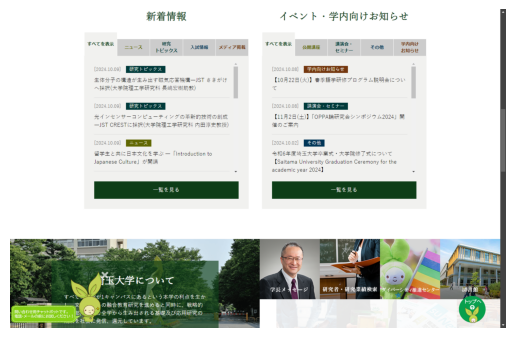

In [32]:
# スクリーンショットを保存するファイル名
image_file = 'ex1_screenshot.png'

# selenium の初期設定 (Microsoft Edge)
options = Options()

# EdgeのWebDriverを使用
driver = webdriver.Edge(options=options)

# Webページを開く
driver.set_window_size(1500,1500)
driver.get(url)
time.sleep(5)  # 5秒スリープしてページが完全に読み込まれるのを待つ

# '新着情報' の部分にスクロール
try:
    # '新着情報' 見出しの要素を探す
    element = driver.find_element(By.CLASS_NAME, 'news_midashi')

    # 見出しが画面の上部に来るまでスクロール
    driver.execute_script("arguments[0].scrollIntoView(true);", element)

    # スクロール後、少し待機してからスクリーンショット
    time.sleep(2)
    driver.save_screenshot(image_file)

finally:
    # ドライバを閉じる
    driver.quit()

# 画像を読み込んで表示
image = plt.imread(image_file)
plt.imshow(image)
plt.axis('off')
plt.show()

#### (3) 新着情報のURLを出力
　HTMLに見られるページが実際に存在することが確認できたため，最後にそれらのURLをリストする．

In [33]:
# URLを格納するためのリストを作成
url_list = []

# tabindexが0の要素を限定して取得
tabindex_0_elements = soup.find_all(attrs={"tabindex": "0"})

# tabindex="0" の要素の中から、news_itemクラスを持つdivタグを探す
for element in tabindex_0_elements:
    news_items = element.find_all('div', class_='news_item')
    
    # 各news_itemから<dd>タグ内の<a>タグのhref属性を取得してリストに追加
    for item in news_items:
        a_tag = item.find('a')

        # href属性が存在する場合のみURLを取得
        if a_tag and a_tag.has_attr('href'):
            link = a_tag['href']
            # 絶対パスではない場合、サイトのベースURLを追加
            if not link.startswith('http'):
                link = 'https://www.saitama-u.ac.jp' + link
            url_list.append(link)

# URLリストを表示
for url in url_list:
    print(url)

# 取得したURLの数を表示
print(f'The number of URL is {len(url_list)}.')

https://www.saitama-u.ac.jp/topics_archives/202410080930.html
https://www.saitama-u.ac.jp/topics_archives/202410091000.html
https://www.saitama-u.ac.jp/news_archives/202410090900.html
https://www.saitama-u.ac.jp/international/archives/202410071500.html
https://www.saitama-u.ac.jp/media_archives/202410080900.html
https://www.saitama-u.ac.jp/topics_archives/202410041000.html
https://www.saitama-u.ac.jp/exam_archives/202410031000.html
https://www.saitama-u.ac.jp/topics_archives/202410021400.html
https://www.saitama-u.ac.jp/news_archives/202410021000.html
https://www.saitama-u.ac.jp/topics_archives/202410021100.html
https://www.saitama-u.ac.jp/international/archives/202410071000.html
https://www.saitama-u.ac.jp/seminar_archives/202410080900.html
https://www.saitama-u.ac.jp/etc_archives/202410021500.html
https://www.saitama-u.ac.jp/research/topics/archives/techno2024.html
https://www.saitama-u.ac.jp/research/topics/archives/3dcad2024.html
https://www.saitama-u.ac.jp/international/archives/2

### 【課題2】埼玉大学シラバスより特定科目のシラバスをスクレイピング
　selenium を用いて[埼玉大学](https://www.saitama-u.ac.jp/#:~:text=%E5%9F%BC%E7%8E%89%E5%A4%A7%E5%AD%A6%E3%82%AA%E3%83%BC%E3%83%97%E3%83%B3%E3%82%AD%E3%83%A3)のトップページに掲載されている新着情報をクローリングする．

#### (1) HTMLから特定の文字列を含む部分を抽出
　この作業によって，ページ内の新着情報に関わる部分を特定し，そのIDを取得することを目的とする．

In [34]:
# URLで指定したWebページを取得
url = 'https://syllabus.risyu.saitama-u.ac.jp/syllabus/'

try:
    res = requests.get(url)
    res.raise_for_status()  # HTTPエラーがあれば例外を発生
    # HTMLを行ごとに分割して出力
    for i, line in enumerate(res.text.splitlines(), start=1):
        print(f'{i:04}: {line.strip()}')  # 行番号を付けて表示
except requests.exceptions.RequestException as e:
    print(f"Error fetching the URL: {e}")

0001: 
0002: 
0003: 
0004: 
0005: 
0006: 
0007: 
0008: 
0009: 
0010: 
0011: 
0012: 
0013: <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
0014: "http://www.w3.org/TR/html4/loose.dtd">
0015: 
0016: <html>
0017: 
0018: 
0019: 
0020: 
0021: <head>
0022: <meta name="viewport" content="width=device-width, initial-scale=1.0"/>
0023: <meta charset="UTF-8">
0024: <meta http-equiv="X-UA-Compatible" content="IE=Edge" />
0025: 
0026: 
0027: <meta http-equiv="Cache-Control" content="no-cache">
0028: <meta http-equiv="Pragma" content="no-cache">
0029: <meta http-equiv="Expires" content="Thu, 01 Dec 1994 16:00:00 GMT">
0030: 
0031: 
0032: 
0033: <meta name="format-detection" content="telephone=no">
0034: 
0035: 
0036: <link rel="SHORTCUT ICON" href="/syllabus/theme/default/image/favicon.ico">
0037: 
0038: 
0039: <title>シラバス検索</title>
0040: 
0041: 
0042: 
0043: <link type="text/css" rel="stylesheet" href="/syllabus/static/pub/jquery-core/3.4.1/themes/smoothness/theme.css" />
0044: <scr

#### (2) 大学院講義＞機械科学専攻＞後期に開講される科目を検索しHTML構造を取得

Current URL: https://syllabus.risyu.saitama-u.ac.jp/syllabus/campussquare.do?_flowExecutionKey=_cC928D237-E0D8-8134-BEB4-DA057C6C5C68_k72249880-E692-AF91-2FE7-94A4AD89856C
<html><head>
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<meta charset="UTF-8">
<meta http-equiv="X-UA-Compatible" content="IE=Edge">


<meta http-equiv="Cache-Control" content="no-cache">
<meta http-equiv="Pragma" content="no-cache">
<meta http-equiv="Expires" content="Thu, 01 Dec 1994 16:00:00 GMT">



<meta name="format-detection" content="telephone=no">


<link rel="SHORTCUT ICON" href="/syllabus/theme/default/image/favicon.ico">

 
<title>シラバス参照／検索結果</title>



<link type="text/css" rel="stylesheet" href="/syllabus/static/pub/jquery-core/3.4.1/themes/smoothness/theme.css">
<script type="text/javascript" src="/syllabus/static/pub/jquery-core/3.4.1/jquery-3.4.1.min.js"></script>




<link type="text/css" rel="stylesheet" href="/syllabus/static/pub/campus/6.0/css/old50_StyleSheet.css">
<s

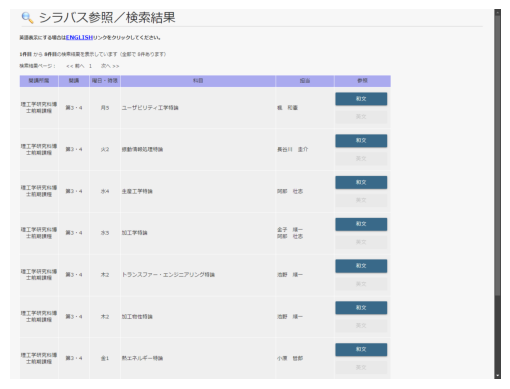

In [35]:
image_file = 'ex2_screenshot.png'

driver = webdriver.Chrome(options=options)
driver.set_window_size(1280, 2000)
driver.get(url)
time.sleep(1)  # 1秒スリープ

# ドロップダウンで条件を設定
dropdown_1 = driver.find_element(By.CSS_SELECTOR, '#jikanwariShozokuCd')  # 時間割所属
select_1 = Select(dropdown_1)
select_1.select_by_visible_text('　機械科学専攻')
time.sleep(1)  # 1秒スリープ

dropdown_2 = driver.find_element(By.CSS_SELECTOR, '#kaikoKbnCd')  # 開講区分
select_2 = Select(dropdown_2)
select_2.select_by_visible_text('第3・4')
time.sleep(1)  # 1秒スリープ

# 「検索」をクリック
search_button = driver.find_element(By.CSS_SELECTOR, "#jikanwariKeywordForm > table > tbody > tr:nth-child(11) > td > p > input:nth-child(1)")
search_button.click()
time.sleep(1)  # 1秒スリープ

# 検索結果のURLを取得
current_url = driver.current_url
print(f"Current URL: {current_url}")

# 検索結果のHTMLを取得して出力
page_html = driver.page_source
print(page_html)

# ブラウザのスクリーンショット(検索結果)を保存して表示
driver.save_screenshot(image_file)
image = plt.imread(image_file)
plt.axis('off')
plt.imshow(image)
plt.show()

driver.quit()

#### (3) 各科目名とそのURLを出力

In [36]:
driver = webdriver.Chrome(options=options)
driver.set_window_size(1280, 2000)
driver.get(url)
time.sleep(1)  # 1秒スリープ

# ドロップダウンで条件を設定
dropdown_1 = driver.find_element(By.CSS_SELECTOR, '#jikanwariShozokuCd')  # 時間割所属
select_1 = Select(dropdown_1)
select_1.select_by_visible_text('　機械科学専攻')
time.sleep(1)  # 1秒スリープ

dropdown_2 = driver.find_element(By.CSS_SELECTOR, '#kaikoKbnCd')  # 開講区分
select_2 = Select(dropdown_2)
select_2.select_by_visible_text('第3・4')
time.sleep(1)  # 1秒スリープ

# 「検索」をクリック
search_button = driver.find_element(By.CSS_SELECTOR, "#jikanwariKeywordForm > table > tbody > tr:nth-child(11) > td > p > input:nth-child(1)")
search_button.click()
time.sleep(1)  # 1秒スリープ

# 検索結果の数を取得
result_number = driver.find_element(By.CSS_SELECTOR, '#jikanwariKeywordForm > div > b:nth-child(4)').text
result_number = int(re.sub(r'件目', '', result_number))
print(f'The number of data is {result_number}.\n')

# 検索結果中の講義名とシラバスのURLを取得して表示
text_list = []  # 講義名リスト
url_list = []  # URLリスト

for _no in range(result_number):
    # 講義名を取得
    _text = driver.find_element(By.CSS_SELECTOR, f'#jikanwariKeywordForm > div > table > tbody > tr:nth-child({_no + 1}) > td:nth-child(4)').text
    # シラバスのリンクを取得
    syllabus_url = driver.find_element(By.CSS_SELECTOR, f'#jikanwariKeywordForm > div > table > tbody > tr:nth-child({_no + 1}) > td:nth-child(6) > input:nth-child(1)').get_attribute('onclick')
    # URLの解析
    syllabus_url = re.search(r"'(.*?)'", syllabus_url).group(1)
    syllabus_url = f"https://syllabus.risyu.saitama-u.ac.jp{syllabus_url}"
    
    # 結果を表示
    print(f'{_text}: {syllabus_url}')

    # リストに追加
    text_list.append(_text)
    url_list.append(syllabus_url)

# selenium のドライバを終了
driver.quit()

The number of data is 8.

ユーザビリティ工学特論: https://syllabus.risyu.saitama-u.ac.jp/syllabusHtml/2024/240401/240401_MM40280_ja_JP.html
振動情報処理特論: https://syllabus.risyu.saitama-u.ac.jp/syllabusHtml/2024/240401/240401_MM40320_ja_JP.html
生産工学特論: https://syllabus.risyu.saitama-u.ac.jp/syllabusHtml/2024/240401/240401_MM40060_ja_JP.html
加工学特論: https://syllabus.risyu.saitama-u.ac.jp/syllabusHtml/2024/240401/240401_MM40070_ja_JP.html
トランスファー・エンジニアリング特論: https://syllabus.risyu.saitama-u.ac.jp/syllabusHtml/2024/240401/240401_MM40140_ja_JP.html
加工物性特論: https://syllabus.risyu.saitama-u.ac.jp/syllabusHtml/2024/240401/240401_MM40150_ja_JP.html
熱エネルギー特論: https://syllabus.risyu.saitama-u.ac.jp/syllabusHtml/2024/240401/240401_MM40100_ja_JP.html
反応性気体力学特論: https://syllabus.risyu.saitama-u.ac.jp/syllabusHtml/2024/240401/240401_MM40210_ja_JP.html


### 感想  
　HTMLの構造を読み，データのクローリング・スクレイピングを自動化する作業が慣れないせいか難しかった．また，過去の経験として書道家の文字データを収集したことがあったが，他国のサイトやローカルなWebページだとrobot.txtが用意されていないことも多く，データを取得して良いのか承諾を得る部分でも困難があることを思い出した．